<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (CO<sub>2</sub> emission data)

In the dataset, the CO<sub>2</sub> emission for various regions in the world is given. Our objective is to group the regions based on the factors affecting the environment in terms of the greenhouse gases, where CO<sub>2</sub> is a primary greenhouse gas. 

Many developing and developed countries in the world are contributing to the CO<sub>2</sub> emission in the environment. It is interesting to know that the increase in atmospheric carbon dioxide is responsible for about two-thirds of the total energy imbalance that is causing Earth's temperature to rise and leads to global warming.

**Region**: Region of the country

**CO2 Emission**: Annual CO<sub>2</sub> emission (in tonnes)

**Ease of Business**: The ease of business in the country

**Energy Usage**: Energy used by the country in various forms

**GDP**: GDP of a country

**Internet Usage**: Usage of the internet 

**Population total**: Total population of a country

## Table of Content

1. **[Exploratory Data Analysis](#lib)**
2. **[Hierarchical Clustering](#hie)**
3. **[DBSCAN](#DBSCAN)**

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df=pd.read_csv('CO2_emission_data.csv')
df.head()

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5.652325e+09,0.010,3033659
1,Europe,4166,151,2172,7.464447e+09,0.024,3014579
2,Europe,4254,151,2172,8.376484e+09,0.060,2992724
3,Europe,3865,151,2068,9.132562e+09,0.096,2968028
4,Europe,4056,151,2025,1.070101e+10,0.150,2940880



### Let's begin with some hands-on practice exercises

<a id="lib"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify the different regions to which the countries belong and visualize the count of countries.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

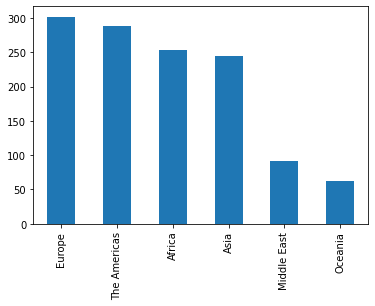

In [3]:
df['Region'].value_counts().plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype, dimension and summary statistics of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.dtypes

Region               object
CO2 Emissions         int64
Ease of Business      int64
Energy Usage          int64
GDP                 float64
Internet Usage      float64
Population Total      int64
dtype: object

In [5]:
df.shape

(1243, 7)

In [6]:
df.describe()

,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
count,1.243000e+03,1243.000000,1.243000e+03,1.243000e+03,1236.000000,1.243000e+03
mean,1.897666e+05,88.279968,7.541842e+04,3.535548e+11,0.329983,4.513494e+07
std,7.697027e+05,52.770388,2.707586e+05,1.358970e+12,1.634042,1.600483e+08
min,4.800000e+01,1.000000,3.000000e+01,1.232585e+08,0.000000,6.966000e+04
25%,3.111500e+03,45.000000,2.721000e+03,7.746581e+09,0.062000,2.097088e+06
50%,1.620800e+04,85.000000,9.318000e+03,2.468037e+10,0.200500,7.739900e+06
75%,7.581200e+04,131.000000,3.495650e+04,1.770000e+11,0.460000,2.884664e+07
max,8.286892e+06,186.000000,2.727728e+06,1.620000e+13,57.000000,1.350695e+09


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Drop the variables 'Region', 'Ease of Business', 'Internet Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df=df.drop(['Region', 'Ease of Business', 'Internet Usage'],axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if there are missing values, if yes then remove the observations with missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df.isnull().sum()

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check if there are outliers in the data and visualize the outliers using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

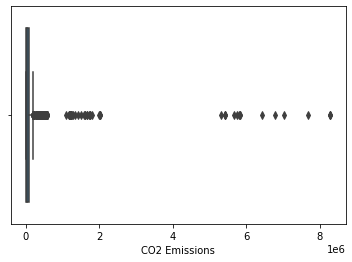

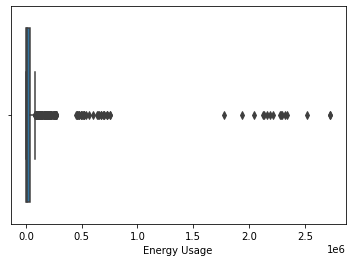

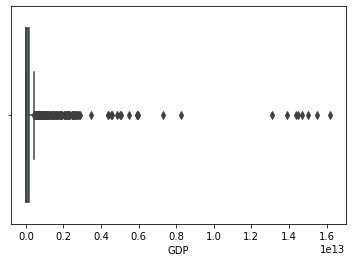

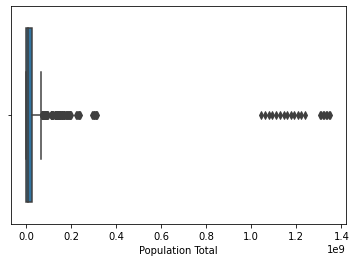

In [9]:
for col in df.columns:
    sns.boxplot(x=col,data=df)
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using 3.5IQR and check the shape of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

dfc=df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]
dfc=dfc.reset_index(drop=True)

In [11]:
dfc.shape

(959, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Visualize the data obtained after removing the outliers with the help of a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

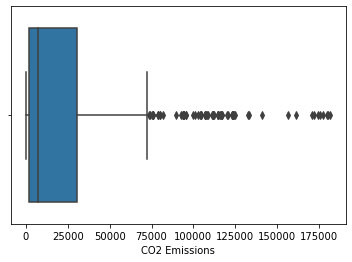

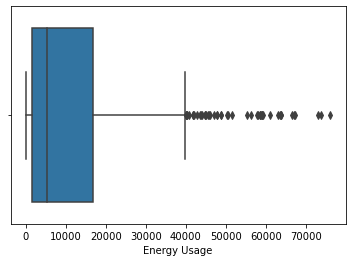

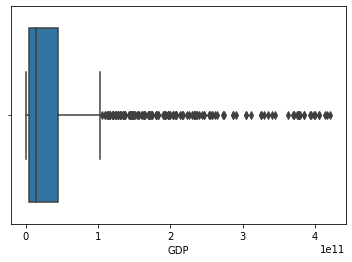

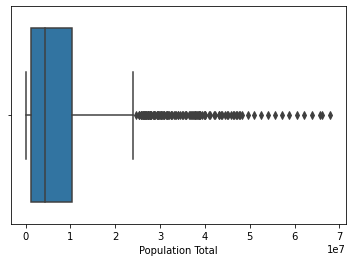

In [12]:
for col in df.columns:
    sns.boxplot(x=col,data=dfc)
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
dfcs=ss.fit_transform(dfc)
dfcs=pd.DataFrame(dfcs,columns=dfc.columns)
dfcs.describe()

,CO2 Emissions,Energy Usage,GDP,Population Total
count,9.590000e+02,9.590000e+02,9.590000e+02,9.590000e+02
mean,3.009989e-17,-6.578563e-17,2.564279e-17,3.924563e-17
std,1.000522e+00,1.000522e+00,1.000522e+00,1.000522e+00
min,-6.956444e-01,-7.964680e-01,-5.947080e-01,-7.555132e-01
25%,-6.334788e-01,-6.937667e-01,-5.394153e-01,-6.682006e-01
50%,-4.735255e-01,-4.172297e-01,-4.149283e-01,-3.897600e-01
75%,2.228619e-01,4.309051e-01,-4.921532e-02,1.050455e-01
max,4.762847e+00,4.760214e+00,4.617271e+00,4.940193e+00


<a id="hie"></a>
## 2. Hierarchical Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the 'ward' linkage method and print the first 10 observations of the linkage matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
plt.figure(figsize=(25,10))
link=linkage(dfcs,method='ward')

link[:10]

array([[3.68000000e+02, 3.70000000e+02, 3.31426860e-05, 2.00000000e+00],
       [3.79000000e+02, 3.80000000e+02, 5.57596819e-05, 2.00000000e+00],
       [3.69000000e+02, 3.71000000e+02, 1.26515231e-04, 2.00000000e+00],
       [3.60000000e+01, 3.70000000e+01, 1.30664244e-04, 2.00000000e+00],
       [2.60000000e+01, 2.70000000e+01, 1.60740409e-04, 2.00000000e+00],
       [3.72000000e+02, 3.73000000e+02, 2.01381843e-04, 2.00000000e+00],
       [4.64000000e+02, 4.65000000e+02, 2.12888799e-04, 2.00000000e+00],
       [7.58000000e+02, 7.60000000e+02, 2.17210956e-04, 2.00000000e+00],
       [8.83000000e+02, 8.84000000e+02, 2.24105610e-04, 2.00000000e+00],
       [7.57000000e+02, 7.59000000e+02, 2.41935452e-04, 2.00000000e+00]])

<Figure size 1800x720 with 0 Axes>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the clusters obtained using dendrogram and find the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

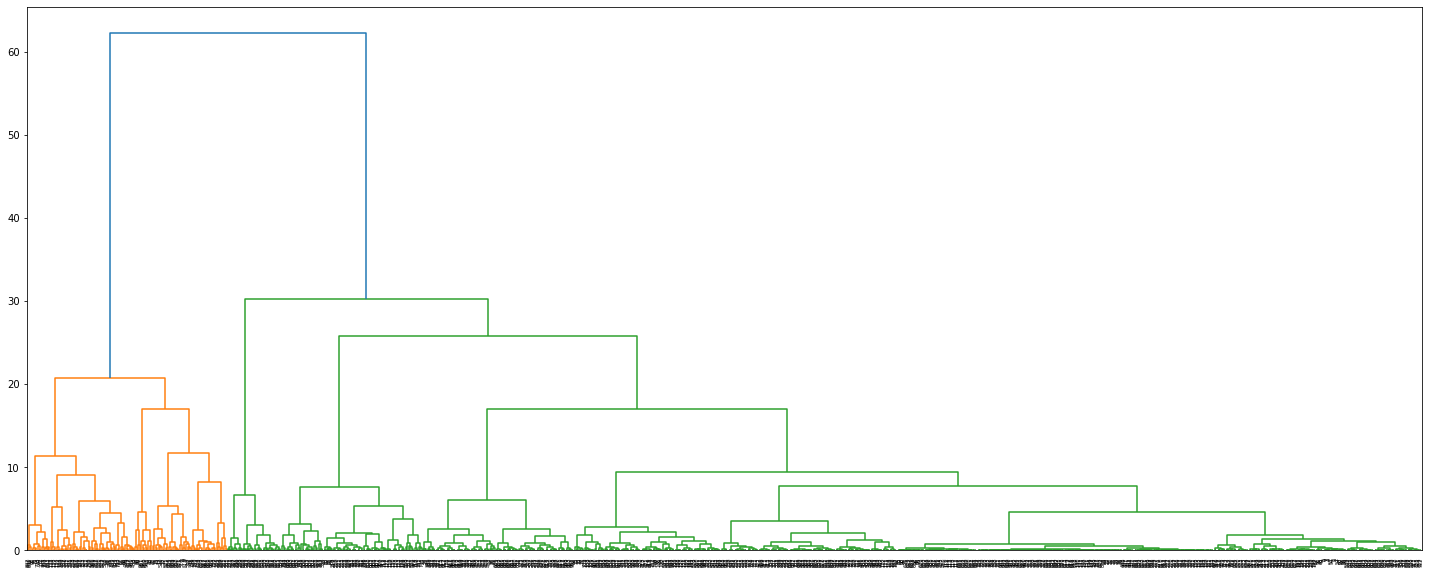

In [15]:
plt.figure(figsize=(25,10))
dendrogram(link)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the cophenetic correlation coefficient and interpret it.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import cophenet
eucl_dist = euclidean_distances(dfcs)
dist_array=eucl_dist[np.triu_indices(959,k=1)]

coeff,cophenet_dist=cophenet(link,dist_array)
print('cophenetic correlation :',coeff)

cophenetic correlation : 0.8592863001700541


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Instantiate clustering method with an optimal number of clusters and 'ward' linkage method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
clustercut=pd.Series(cut_tree(link,n_clusters=4).reshape(-1,))
clustercut

0      0
1      0
2      0
3      0
4      0
      ..
954    0
955    0
956    0
957    0
958    0
Length: 959, dtype: int32

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Obtain the cluster labels and add a column containing the cluster number to the original data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
dfc.loc[:,'cluster']=clustercut
dfc.head()

,CO2 Emissions,Energy Usage,GDP,Population Total,cluster
0,4294,1976,5.652325e+09,3033659,0
1,4166,2172,7.464447e+09,3014579,0
2,4254,2172,8.376484e+09,2992724,0
3,3865,2068,9.132562e+09,2968028,0
4,4056,2025,1.070101e+10,2940880,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
dfc['cluster'].value_counts()

0    687
1    138
2     97
3     37
Name: cluster, dtype: int64

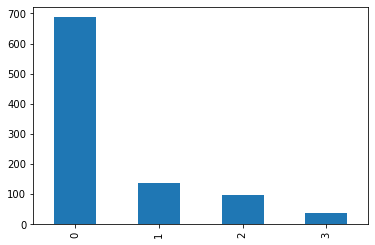

In [28]:
dfc['cluster'].value_counts().plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Plot the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='CO2 Emissions', ylabel='Energy Usage'>

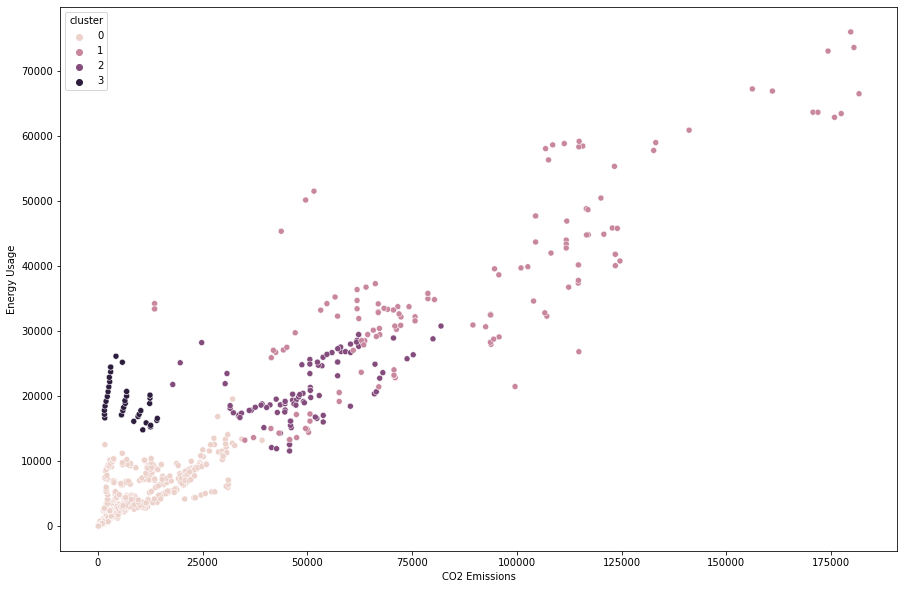

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='CO2 Emissions',y='Energy Usage',data=dfc,hue='cluster')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Obtain the first 10 observations for 1st cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
dfc[dfc['cluster']==0].head(10)

,CO2 Emissions,Energy Usage,GDP,Population Total,cluster
0,4294,1976,5.652325e+09,3033659,0
1,4166,2172,7.464447e+09,3014579,0
2,4254,2172,8.376484e+09,2992724,0
3,3865,2068,9.132562e+09,2968028,0
4,4056,2025,1.070101e+10,2940880,0
5,4129,2061,1.288135e+10,2912559,0
6,3880,2068,1.204421e+10,2884303,0
7,4283,2059,1.192695e+10,2856673,0
18,9065,9004,1.418895e+10,15421075,0
19,18793,9676,1.964086e+10,15976715,0


In [36]:
dfc[dfc['cluster']==0].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,cluster
count,687.000000,687.000000,6.870000e+02,6.870000e+02,687.0
mean,7512.620087,3809.045124,1.333701e+10,5.111782e+06,0.0
std,8397.723559,3566.686104,1.457612e+10,6.124091e+06,0.0
min,48.000000,30.000000,1.232585e+08,6.966000e+04,0.0
25%,1032.000000,401.000000,2.117754e+09,6.166900e+05,0.0
50%,4360.000000,3022.000000,8.734651e+09,3.002911e+06,0.0
75%,11393.500000,6583.500000,1.865577e+10,6.665144e+06,0.0
max,39167.000000,19585.000000,8.417809e+10,2.747438e+07,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the first 10 observations for the 2nd cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
dfc[dfc['cluster']==1].head(10)

,CO2 Emissions,Energy Usage,GDP,Population Total,cluster
8,92533,30698,6.786383e+10,33003442,1
9,89493,30974,8.532500e+10,33461345,1
10,107128,32335,1.030000e+11,33960903,1
11,103963,34658,1.170000e+11,34507214,1
12,112339,36793,1.350000e+11,35097043,1
13,114619,37425,1.710000e+11,35725377,1
14,124586,40823,1.370000e+11,36383302,1
15,123475,40105,1.610000e+11,37062820,1
16,123475,41852,1.990000e+11,37762962,1
17,123475,41852,2.040000e+11,38481705,1


In [38]:
dfc[dfc['cluster']==1].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,cluster
count,138.000000,138.000000,1.380000e+02,1.380000e+02,138.0
mean,87044.021739,36929.007246,2.051115e+11,2.070226e+07,1.0
std,36944.059143,14135.441328,1.040479e+11,1.308711e+07,0.0
min,13520.000000,13248.000000,1.430751e+10,1.910902e+06,1.0
25%,61844.000000,28627.500000,1.327500e+11,8.309822e+06,1.0
50%,75680.000000,33510.000000,1.925000e+11,2.030718e+07,1.0
75%,112226.250000,44634.000000,2.610000e+11,3.088313e+07,1.0
max,181630.000000,76075.000000,4.210000e+11,4.770443e+07,1.0


<a id="DBSCAN"></a>
## 3. DBSCAN

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Perform DBSCAN for the data given using 0.7 as epsilon and 9 minimum samples. Display the unique number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
from sklearn.cluster import DBSCAN
ss=StandardScaler()
dfs=ss.fit_transform(df)

dbscan=DBSCAN(eps=0.7,min_samples=9)
dbscan.fit(dfs)

pd.Series(dbscan.labels_).value_counts()

 0    1198
-1      45
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check for the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

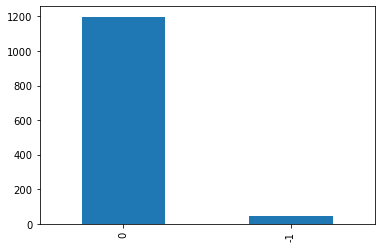

In [42]:
pd.Series(dbscan.labels_).value_counts().plot.bar()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Describe the outliers identified by the DBSCAN algorithm in the previous question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
labels=pd.Series(dbscan.labels_)
df['cluster']=labels
df_out=df[df['cluster']==-1]
df_out.describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,cluster
count,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,45.0
mean,3.263231e+06,1.181653e+06,4.945600e+12,6.680892e+08,-1.0
std,2.495366e+06,8.234717e+05,4.990569e+12,5.232036e+08,0.0
min,1.100650e+06,4.515010e+05,4.770000e+11,1.274505e+08,-1.0
25%,1.281914e+06,5.198070e+05,1.240000e+12,1.423855e+08,-1.0
50%,1.740776e+06,6.983600e+05,2.710000e+12,3.115826e+08,-1.0
75%,5.656839e+06,2.132446e+06,5.930000e+12,1.190138e+09,-1.0
max,8.286892e+06,2.727728e+06,1.620000e+13,1.350695e+09,-1.0
